In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Getting the CSV file names (as generated by `RMS.ipynb`)

In [2]:
datadir = './data/'
prefix = 'dao_'
calcs = ['noNAG',
         'noNAG_TRE5',
         'noNAG_TRE25',
         'noNAG_TRE100',
         'noNAG_TRE500']
plots = ['EKTOT','EPTOT','ETOT','PRES','RG','RMSD','TEMP']
plots = ['RG','RMSD','_CARMSF','_CGRMSF','EPTOT','TEMP']
datafiles = ['{0}{1}{2}.csv'.format(prefix,calc,plot) for calc in calcs for plot in plots]
print(datafiles)

['dao_noNAGRG.csv', 'dao_noNAGRMSD.csv', 'dao_noNAG_CARMSF.csv', 'dao_noNAG_CGRMSF.csv', 'dao_noNAGEPTOT.csv', 'dao_noNAGTEMP.csv', 'dao_noNAG_TRE5RG.csv', 'dao_noNAG_TRE5RMSD.csv', 'dao_noNAG_TRE5_CARMSF.csv', 'dao_noNAG_TRE5_CGRMSF.csv', 'dao_noNAG_TRE5EPTOT.csv', 'dao_noNAG_TRE5TEMP.csv', 'dao_noNAG_TRE25RG.csv', 'dao_noNAG_TRE25RMSD.csv', 'dao_noNAG_TRE25_CARMSF.csv', 'dao_noNAG_TRE25_CGRMSF.csv', 'dao_noNAG_TRE25EPTOT.csv', 'dao_noNAG_TRE25TEMP.csv', 'dao_noNAG_TRE100RG.csv', 'dao_noNAG_TRE100RMSD.csv', 'dao_noNAG_TRE100_CARMSF.csv', 'dao_noNAG_TRE100_CGRMSF.csv', 'dao_noNAG_TRE100EPTOT.csv', 'dao_noNAG_TRE100TEMP.csv', 'dao_noNAG_TRE500RG.csv', 'dao_noNAG_TRE500RMSD.csv', 'dao_noNAG_TRE500_CARMSF.csv', 'dao_noNAG_TRE500_CGRMSF.csv', 'dao_noNAG_TRE500EPTOT.csv', 'dao_noNAG_TRE500TEMP.csv']


graphing joint plots for the different calculations

In [3]:
dfiles=[]

for plot in plots:
    for calc in calcs:
        datafile = datadir+'{0}{1}{2}.csv'.format(prefix,calc,plot)
        dfiles.append(datafile)    

print(dfiles)

['./data/dao_noNAGRG.csv', './data/dao_noNAG_TRE5RG.csv', './data/dao_noNAG_TRE25RG.csv', './data/dao_noNAG_TRE100RG.csv', './data/dao_noNAG_TRE500RG.csv', './data/dao_noNAGRMSD.csv', './data/dao_noNAG_TRE5RMSD.csv', './data/dao_noNAG_TRE25RMSD.csv', './data/dao_noNAG_TRE100RMSD.csv', './data/dao_noNAG_TRE500RMSD.csv', './data/dao_noNAG_CARMSF.csv', './data/dao_noNAG_TRE5_CARMSF.csv', './data/dao_noNAG_TRE25_CARMSF.csv', './data/dao_noNAG_TRE100_CARMSF.csv', './data/dao_noNAG_TRE500_CARMSF.csv', './data/dao_noNAG_CGRMSF.csv', './data/dao_noNAG_TRE5_CGRMSF.csv', './data/dao_noNAG_TRE25_CGRMSF.csv', './data/dao_noNAG_TRE100_CGRMSF.csv', './data/dao_noNAG_TRE500_CGRMSF.csv', './data/dao_noNAGEPTOT.csv', './data/dao_noNAG_TRE5EPTOT.csv', './data/dao_noNAG_TRE25EPTOT.csv', './data/dao_noNAG_TRE100EPTOT.csv', './data/dao_noNAG_TRE500EPTOT.csv', './data/dao_noNAGTEMP.csv', './data/dao_noNAG_TRE5TEMP.csv', './data/dao_noNAG_TRE25TEMP.csv', './data/dao_noNAG_TRE100TEMP.csv', './data/dao_noNAG_T

now plot using subplots

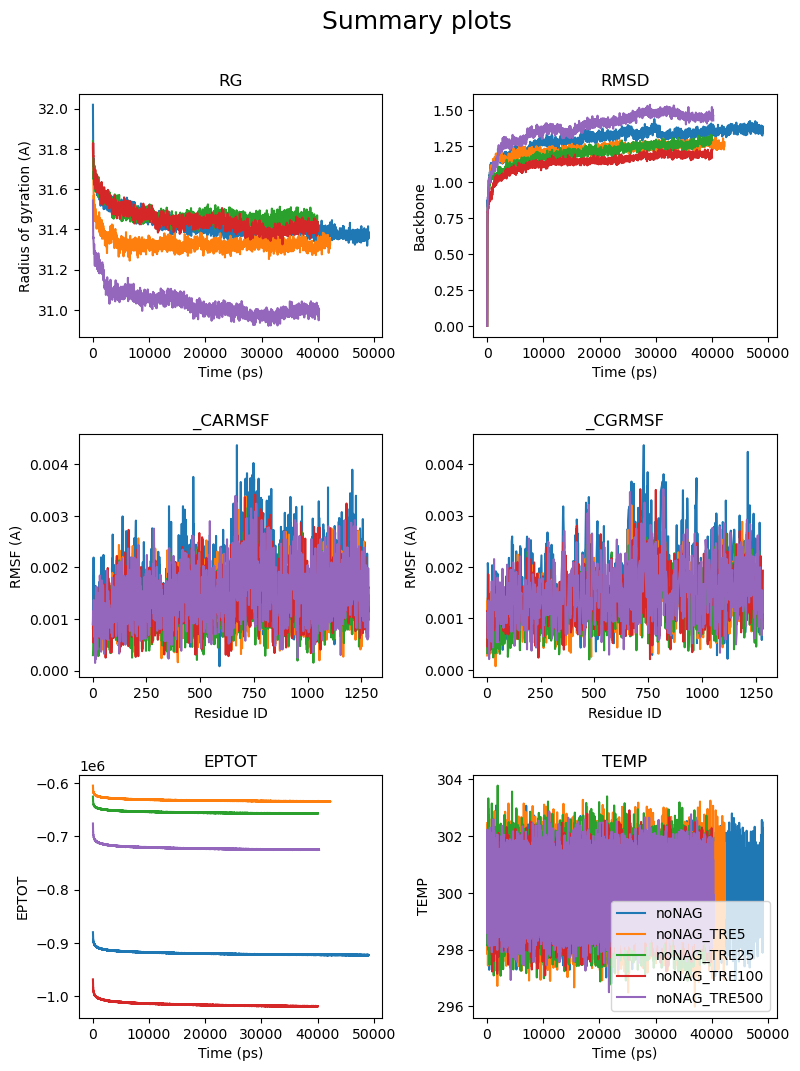

In [4]:
plt.figure(figsize=(9,12))
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.suptitle("Summary plots",fontsize=18, y= 0.95)


for n, plot in enumerate(plots):
    ax = plt.subplot(3,2,n+1)
    ax.set_title(plot)
 
    for calc in calcs:
        datafile = datadir+'{0}{1}{2}.csv'.format(prefix,calc,plot)
        df=pd.read_csv(datafile)
        x_name = df.columns[0]
        y_name = df.columns[1]
        x=df[x_name]
        y=df[y_name]

        #ax.ticklabel_format(useMathText=True,scilimits=(0,0))
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.plot(x,y,label=calc)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(labels,loc='lower right')
plt.savefig('../text/figures/summary.png')